In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render ul li, code{font-size:22pt; line-height:30px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

# 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 봄

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 테스트셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import LeakyReLU, ELU, ReLU
from matplotlib import pyplot as plt # 학습과정 시각화
# scale조정, train_test_split 등을 추가

In [3]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [4]:
print('타겟 :', data[1,0])
#print('이미지(784pixel=28*28) :', data[1, 1:].reshape(28,28))
image = data[1, 1:].reshape(28,28)
image.shape

타겟 : 0.0


(28, 28)

In [5]:
for row in image:
    for pixel in row:
        print("{:3.0f}".format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

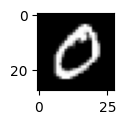

In [6]:
plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')

In [7]:
# 칼라사진 -> 흑백모드로 넘파이 배열로 읽기


In [8]:
%pip install opencv-python==4.8.1.78

Note: you may need to restart the kernel to use updated packages.


In [9]:
import cv2
# 사진이미지를 흑백포맷으로 넘파이 배열로 읽어오기
image_gray = cv2.imread('data/sample.jpg', cv2.IMREAD_GRAYSCALE)
image_gray.shape

(408, 612)

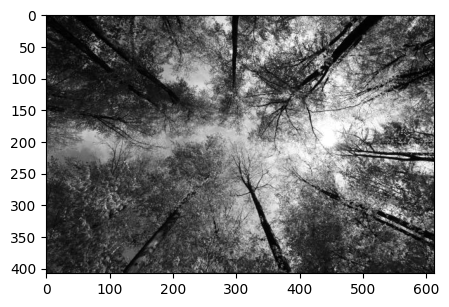

In [10]:
plt.figure(figsize=(5,5))
plt.imshow(image_gray, cmap='gray')

# 1. 데이터 생성 및 전처리

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

2


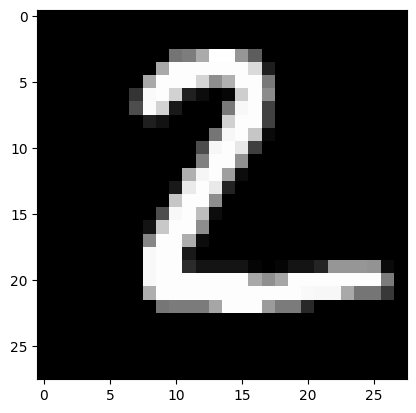

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0116125171255255150 93  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0169253253253253253253218 30  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0169253253253213142176253253122  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 52250253210 32 12  0  6206253140  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 77251210 25  0  0  0122248253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 31 18  0  0  0  0209253253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0117247253198 10  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 76247253231 63  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0128253253144  0  0  0  0  0  

In [12]:
print(y_test[1])
plt.imshow(X_test[1], cmap='gray')
plt.show()
for row in X_test[1]:
    for pixel in row:
        print("{:3.0f}".format(pixel), end='')
    print()

In [13]:
# Train데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [14]:
print('학습셋 :', X_train.shape, y_train.shape)
print('검증셋 :', X_val.shape, y_val.shape)
print('시험셋 :', X_test.shape, y_test.shape)

학습셋 : (50000, 28, 28) (50000,)
검증셋 : (10000, 28, 28) (10000,)
시험셋 : (10000, 28, 28) (10000,)


In [15]:
# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [16]:
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10:카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_Y.shape, val_Y.shape, test_Y.shape

((50000, 10), (10000, 10), (10000, 10))

In [17]:
# Train 5만->700개, Val만->300개 (목적:수업시간 중 fit시간 절약)
train_idx = np.random.choice(50000, 700) # 0~50000미만의 수 700개 비복원추출
val_idx   = np.random.choice(10000, 300)
train_X = train_X[train_idx]
train_Y = train_Y[train_idx]
val_X   = val_X[val_idx]
val_Y   = val_Y[val_idx]

In [18]:
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape

((700, 784), (700, 10), (300, 784), (300, 10), (10000, 784), (10000, 10))

# 2. 모델구성

In [91]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2)) # activation='leakeyrelu' 사용불가
# model.add(ReLU())
model.add(LeakyReLU(alpha=0.01)) # 음수결과에 대해 1%만 통과
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 1570      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 2)                 0         
                                                                 
 dense_3 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 3. 학습과정 설정

In [92]:
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표

# 4. 모델 학습

In [93]:
%%time
hist = model.fit(train_X, train_Y, # 학습셋
                epochs=200,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0)

CPU times: total: 7.83 s
Wall time: 6.81 s


# 5. 모델 평가하기

In [94]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

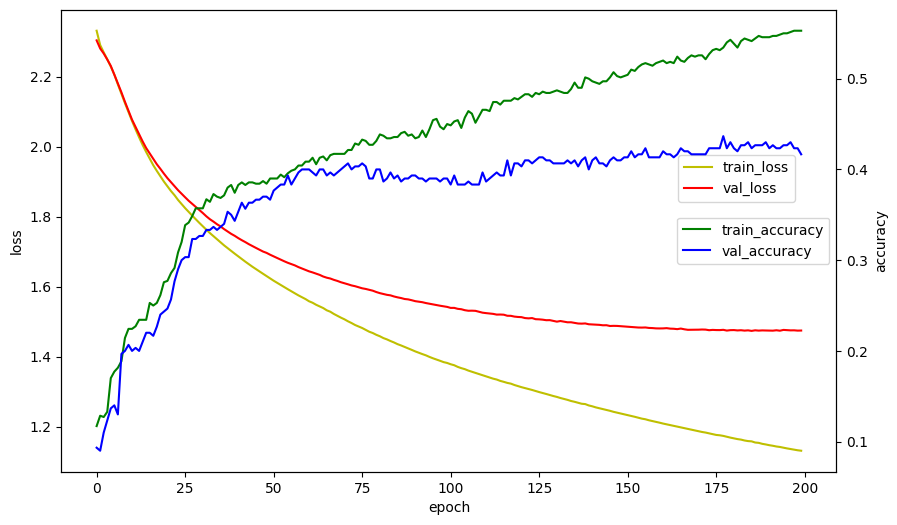

In [95]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [99]:
# 모델 평가(테스트셋)
loss_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_metrics[0])
print('accuracy :', loss_metrics[1])

loss : 1.5109293460845947
accuracy : 0.42179998755455017


# 👍 위 모델(DNN)의 accuracy 늘리기
- 데이터 확보
- 모델 수정
- 
- 
- 

In [19]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Train데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10:카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
# Train 5만->700개, Val만->300개 (목적:수업시간 중 fit시간 절약)
# train_idx = np.random.choice(50000, 700) # 0~50000미만의 수 700개 비복원추출
# val_idx   = np.random.choice(10000, 300)
# train_X = train_X[train_idx]
# train_Y = train_Y[train_idx]
# val_X   = val_X[val_idx]
# val_Y   = val_Y[val_idx]
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2)) # activation='leakeyrelu' 사용불가
# model.add(ReLU())
model.add(LeakyReLU(alpha=0.01)) # 음수결과에 대해 1%만 통과
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표

hist = model.fit(train_X, train_Y, # 학습셋
                epochs=200,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1)

Epoch 1/200
500/500 [==============================] - 1s 2ms/step - loss: 1.7735 - accuracy: 0.3410 - val_loss: 1.5304 - val_accuracy: 0.4675
Epoch 2/200
500/500 [==============================] - 1s 1ms/step - loss: 1.4626 - accuracy: 0.4763 - val_loss: 1.3733 - val_accuracy: 0.4823
Epoch 3/200
500/500 [==============================] - 1s 1ms/step - loss: 1.3479 - accuracy: 0.4947 - val_loss: 1.2782 - val_accuracy: 0.5642
Epoch 4/200
500/500 [==============================] - 1s 1ms/step - loss: 1.2620 - accuracy: 0.5723 - val_loss: 1.2044 - val_accuracy: 0.6018
Epoch 5/200
500/500 [==============================] - 1s 1ms/step - loss: 1.2075 - accuracy: 0.5922 - val_loss: 1.1644 - val_accuracy: 0.6160
Epoch 6/200
500/500 [==============================] - 1s 1ms/step - loss: 1.1717 - accuracy: 0.6060 - val_loss: 1.1295 - val_accuracy: 0.6306
Epoch 7/200
500/500 [==============================] - 1s 1ms/step - loss: 1.1435 - accuracy: 0.6177 - val_loss: 1.1005 - val_accuracy: 0.6387

Epoch 58/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9561 - accuracy: 0.6798 - val_loss: 0.9287 - val_accuracy: 0.6972
Epoch 59/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9552 - accuracy: 0.6804 - val_loss: 0.9274 - val_accuracy: 0.6971
Epoch 60/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9544 - accuracy: 0.6812 - val_loss: 0.9268 - val_accuracy: 0.6975
Epoch 61/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9539 - accuracy: 0.6816 - val_loss: 0.9285 - val_accuracy: 0.6971
Epoch 62/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9531 - accuracy: 0.6817 - val_loss: 0.9264 - val_accuracy: 0.6978
Epoch 63/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9524 - accuracy: 0.6806 - val_loss: 0.9260 - val_accuracy: 0.6974
Epoch 64/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9517 - accuracy: 0.6821 - val_loss: 0.9246 - val_accuracy:

Epoch 115/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9352 - accuracy: 0.6850 - val_loss: 0.9094 - val_accuracy: 0.7017
Epoch 116/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9343 - accuracy: 0.6866 - val_loss: 0.9109 - val_accuracy: 0.7010
Epoch 117/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9351 - accuracy: 0.6865 - val_loss: 0.9095 - val_accuracy: 0.7028
Epoch 118/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9348 - accuracy: 0.6854 - val_loss: 0.9094 - val_accuracy: 0.7025
Epoch 119/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9342 - accuracy: 0.6865 - val_loss: 0.9091 - val_accuracy: 0.7020
Epoch 120/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9344 - accuracy: 0.6869 - val_loss: 0.9095 - val_accuracy: 0.6998
Epoch 121/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9341 - accuracy: 0.6858 - val_loss: 0.9084 - val_ac

500/500 [==============================] - 1s 1ms/step - loss: 0.9283 - accuracy: 0.6863 - val_loss: 0.9042 - val_accuracy: 0.7009
Epoch 172/200
500/500 [==============================] - 1s 2ms/step - loss: 0.9291 - accuracy: 0.6856 - val_loss: 0.9033 - val_accuracy: 0.7017
Epoch 173/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9282 - accuracy: 0.6855 - val_loss: 0.9041 - val_accuracy: 0.7000
Epoch 174/200
500/500 [==============================] - 1s 2ms/step - loss: 0.9282 - accuracy: 0.6853 - val_loss: 0.9036 - val_accuracy: 0.7004
Epoch 175/200
500/500 [==============================] - 1s 2ms/step - loss: 0.9280 - accuracy: 0.6868 - val_loss: 0.9038 - val_accuracy: 0.6995
Epoch 176/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9282 - accuracy: 0.6844 - val_loss: 0.9076 - val_accuracy: 0.6990
Epoch 177/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9282 - accuracy: 0.6847 - val_loss: 0.9025 - val_accuracy: 0.7007